<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Grid Search로 KNN 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [5]:
# 기초통계량 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

In [6]:
# 가변수화
cols = ['RANK']
data = pd.get_dummies(data, columns=cols, drop_first=True)

**2) x, y 분리**

In [7]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**3) 정규화**

In [8]:
# 정규화
cols = ['GRE', 'TOEFL', 'SOP', 'LOR', 'GPA']
x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())

# 확인
x.head()

,GRE,TOEFL,SOP,LOR,GPA,RESEARCH,RANK_2,RANK_3,RANK_4,RANK_5
0,0.94,0.928571,0.875,0.875,0.913462,1,0,0,1,0
1,0.68,0.535714,0.750,0.875,0.663462,1,0,0,1,0
2,0.52,0.428571,0.500,0.625,0.384615,1,0,1,0,0
3,0.64,0.642857,0.625,0.375,0.599359,1,0,1,0,0
4,0.48,0.392857,0.250,0.500,0.451923,0,1,0,0,0


**4) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [10]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
# 2단계: 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [14]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  8]
 [10 57]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        83
           1       0.88      0.85      0.86        67

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



**성능에 대한 고민**

- 위 모델링 과정에서 n_neighbors=5를 지정했습니다.
- n_neighbors를 다른 값으로 지정하면 성능이 더 좋을 수도 있습니다.
- 경험이 없는 상태에서 최적의 파라미터를 지정하기는 쉽지 않습니다.

# 5.성능 튜닝

- GridSearchCV를 사용해 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.

**1) 모델 만들기**

In [15]:
# 1단계: 불러오기
from sklearn.model_selection import GridSearchCV

- 다음 두 가지 모델을 선언합니다.
    - 기본 모델: 기본 알고리즘을 사용하는 튜닝 대상 모델
    - 최종 모델: GridSearchCV 알고리즘을 사용하는 모델
- 다음 정보를 최종 모델에 파라미터로 전달합니다.
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 대수(기본값=5)
    - scoring: 평가 방법

In [16]:
# 1단계: 선언하기
model_knn = KNeighborsClassifier()

# 파라미터 선언
  # n_neighbors: range(5, 51)
param = {'n_neighbors': range(5,51)}

# Grid Search 모델 선언하기
  # cv=10
  # scoring='accuracy'
model = GridSearchCV(model_knn,
                     param,
                     cv=10,
                     scoring='accuracy') # 회귀일때는 R2, 분류일때는 Accuracy

In [17]:
# 2단계: 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 51)}, scoring='accuracy')

**2) 결과 확인**

- model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보가 포함되어 있습니다.
- 데이터프레임으로 만들어 확인하면 좋습니다.

In [20]:
# 데이터프레임 만들기
result= pd.DataFrame(model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008906,0.001370,0.010679,0.001015,5,{'n_neighbors': 5},0.942857,0.771429,0.857143,0.657143,0.885714,0.942857,0.857143,0.771429,0.914286,0.742857,0.834286,0.090170,18
1,0.011541,0.003258,0.015414,0.004632,6,{'n_neighbors': 6},0.914286,0.771429,0.857143,0.685714,0.914286,0.885714,0.828571,0.828571,0.914286,0.800000,0.840000,0.070218,7
2,0.014892,0.000759,0.017120,0.000923,7,{'n_neighbors': 7},0.885714,0.800000,0.857143,0.685714,0.914286,0.914286,0.828571,0.800000,0.914286,0.771429,0.837143,0.071200,12
3,0.015207,0.006196,0.018561,0.008757,8,{'n_neighbors': 8},0.885714,0.771429,0.857143,0.685714,0.885714,0.857143,0.857143,0.800000,0.914286,0.800000,0.831429,0.064460,28
4,0.006876,0.001279,0.008282,0.002317,9,{'n_neighbors': 9},0.828571,0.828571,0.885714,0.685714,0.885714,0.914286,0.828571,0.771429,0.914286,0.800000,0.834286,0.067370,18


In [21]:
# 중요 정보 확인
result[['param_n_neighbors', 'mean_test_score']].head(10)

,param_n_neighbors,mean_test_score
0,5,0.834286
1,6,0.840000
2,7,0.837143
3,8,0.831429
4,9,0.834286
5,10,0.837143
6,11,0.831429
7,12,0.842857
8,13,0.840000
9,14,0.828571


- model.best_params_, model.best_score_ 값이 최적의 파라미터, 최고의 학습성능입니다.

In [22]:
# 선택된 파라미터와 성능 확인
print('최적파라미터:', model.best_params_)
print('성능', model.best_score_)

{'n_neighbors': 32}
0.8457142857142855


- 성능 정보를 시각화해 파라미터에 따른 성능 변화를 확인합니다.

최적파라미터: {'n_neighbors': 32}


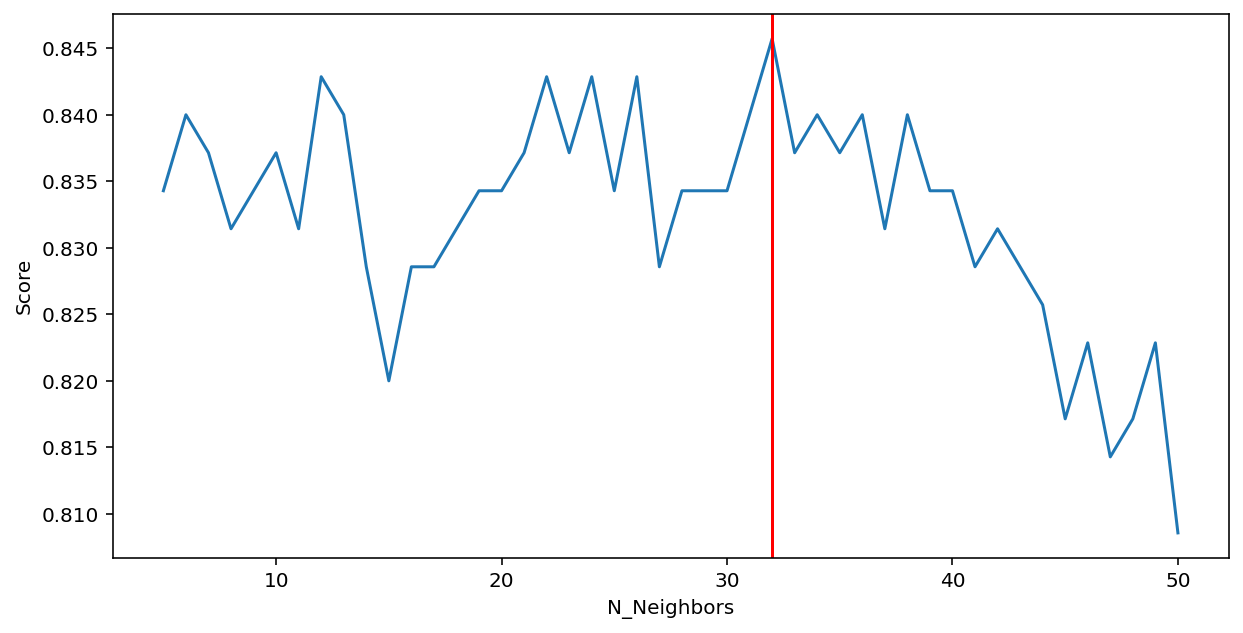

In [23]:
# 최적파라미터 값
print('최적파라미터:', model.best_params_)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(result['param_n_neighbors'], result['mean_test_score'])
plt.axvline(model.best_params_['n_neighbors'], color='r')
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.show()

**3) 예측과 평가**

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수 없는 없겠지요?

In [24]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [25]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76  7]
 [11 56]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        83
           1       0.89      0.84      0.86        67

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

